# 1. Data Exploration

In [1]:
# pip install torch torchvision torchaudio # (For CPU)
import torch                                        # root package
from torch.utils.data import Dataset, DataLoader    # dataset representation and loading
from torchvision import datasets, models, transforms     # vision datasets,architectures & transforms
import torchvision.transforms as transforms              # composable transforms
torch.manual_seed(17)

import os
from pathlib import Path
from glob import glob
import random
from collections import Counter

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from PIL import Image
from scipy.ndimage.interpolation import shift

In [2]:
# View the train.py file provided
!pygmentize scripts/train.py

# You can try fixing incorrect labels, adding data for side case tuning, apply
# data augmentation techniques, or use any other method to improve the data.
# You may also find it helpful to take a look at the training script to get a
# better sense of the preprocessing and model (these are held fixed). The script
# will resize all images to (32, 32) and run them through a cut off ResNet50

import tensorflow as tf
from tensorflow import keras
import numpy as np
import json
import sys

directory = "YOUR_DIRECTORY_NAME_HERE"
user_data = directory + "/train"
valid_data = directory + "/val"
test_data = directory + "/test" # this can be the label book, or any other test set you create

### DO NOT MODIFY BELOW THIS LINE, THIS IS THE FIXED MODEL ###
batch_size = 8
tf.random.set_seed(123)


if __name__ == "__main__":
    train = tf.keras.preprocessing.image_dataset_from_directory(
        user_data + '/train',
        labels="inferred",
        label_mode="categorical",
        class_names=["i"

In [2]:
# View the convert.py file provided
!pygmentize scripts/convert.py

# If you choose to create your own data, you may find this
# script helpful for converting your images:

import cv2
import os

from pathlib import Path
from glob import glob


def convert_images(input_folder, output_folder):
    Path(output_folder).mkdir(parents=True, exist_ok=True)
    input_files = glob(os.path.join(input_folder, "*.png"))
    for f in input_files:
        image = cv2.imread(f, cv2.IMREAD_GRAYSCALE)
        # quantize
        image = (image // 43) * 43
        image[image > 43] = 255
        cv2.imwrite(os.path.join(output_folder, os.path.basename(f)), image)


if __name__ == "__main__":
    folder_name = "YOUR_FOLDER_NAME"
    folders = glob(f"{folder_name}/*")
    for f in folders:
        convert_images(f, f.replace(f"{folder_name}", f"{folder_name}_processed"))


In [3]:
RAW_DATA_FOLDER = 'data/0_raw'
TRAIN_DATA = f'{RAW_DATA_FOLDER}/train'
VALID_DATA = f'{RAW_DATA_FOLDER}/val'

print(f'Train data folder: {os.listdir(TRAIN_DATA)}')
print(f'Validation data folder: {os.listdir(VALID_DATA)}')

Train data folder: ['i', 'ii', 'iii', 'iv', 'ix', 'v', 'vi', 'vii', 'viii', 'x']
Validation data folder: ['i', 'ii', 'iii', 'iv', 'ix', 'v', 'vi', 'vii', 'viii', 'x']


In [5]:
train_img_count = len([os.path.join(dirpath, filename) for dirpath, _, filenames in os.walk(TRAIN_DATA) for filename in filenames])
valid_img_count = len([os.path.join(dirpath, filename) for dirpath, _, filenames in os.walk(VALID_DATA) for filename in filenames])
print(f'Number of train images: {train_img_count}')
print(f'Number of validation images: {valid_img_count}')
print(f'Total number of images: {train_img_count + valid_img_count}')

Number of train images: 2068
Number of validation images: 813
Total number of images: 2881


In [4]:
images = []
labels = []

for folder in os.listdir(TRAIN_DATA):
      for image in os.listdir(TRAIN_DATA + '/' + folder):
        images.append(os.path.join(TRAIN_DATA, folder, image))
        labels.append(folder)

# plt.figure(1, figsize=(15, 9))
# plt.axis('off')
# n = 0

# for i in range(36):
#     n += 1
#     random_index = random.choice(range(len(images)))
#     random_label = labels[random_index]
#     random_img = images[random_index]
#     img = cv2.imread(random_img, cv2.IMREAD_GRAYSCALE)
#     plt.subplot(6, 6, n)
#     plt.axis('off')
#     plt.imshow(img, cmap=plt.get_cmap('gray'))
#     plt.title(random_label)

# plt.show()

In [5]:
images

['data/0_raw/train\\i\\ab9fb784-ce5d-11eb-b317-38f9d35ea60f.png',
 'data/0_raw/train\\i\\aba24486-ce5d-11eb-b317-38f9d35ea60f.png',
 'data/0_raw/train\\i\\aba35128-ce5d-11eb-b317-38f9d35ea60f.png',
 'data/0_raw/train\\i\\aba4001e-ce5d-11eb-b317-38f9d35ea60f.png',
 'data/0_raw/train\\i\\aba4a622-ce5d-11eb-b317-38f9d35ea60f.png',
 'data/0_raw/train\\i\\aba96072-ce5d-11eb-b317-38f9d35ea60f.png',
 'data/0_raw/train\\i\\abaae12c-ce5d-11eb-b317-38f9d35ea60f.png',
 'data/0_raw/train\\i\\abab984c-ce5d-11eb-b317-38f9d35ea60f.png',
 'data/0_raw/train\\i\\abac5714-ce5d-11eb-b317-38f9d35ea60f.png',
 'data/0_raw/train\\i\\abad35f8-ce5d-11eb-b317-38f9d35ea60f.png',
 'data/0_raw/train\\i\\abadf178-ce5d-11eb-b317-38f9d35ea60f.png',
 'data/0_raw/train\\i\\abb1f8e0-ce5d-11eb-b317-38f9d35ea60f.png',
 'data/0_raw/train\\i\\abb304d8-ce5d-11eb-b317-38f9d35ea60f.png',
 'data/0_raw/train\\i\\abb3aeb0-ce5d-11eb-b317-38f9d35ea60f.png',
 'data/0_raw/train\\i\\abb4beb8-ce5d-11eb-b317-38f9d35ea60f.png',
 'data/0_r

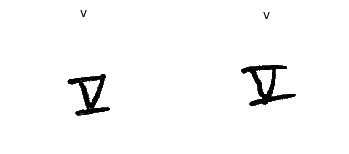

In [7]:
# Show images side by side
random_index = random.choice(range(len(images)))
random_index_2 = random_index + 1

img_1 = cv2.imread(images[random_index], cv2.IMREAD_GRAYSCALE)
img_2 = cv2.imread(images[random_index_2], cv2.IMREAD_GRAYSCALE)

# display images
fig, ax = plt.subplots(1,2)
ax[0].axis('off')
ax[1].axis('off')

ax[0].set_title(labels[random_index])
ax[1].set_title(labels[random_index_2])

ax[0].imshow(img_1, cmap=plt.get_cmap('gray'));
ax[1].imshow(img_2, cmap=plt.get_cmap('gray'));

In [17]:
# Get dimensions and file extensions of images in TRAIN data
dimensions = []
file_ext = []

for folder in os.listdir(TRAIN_DATA):
      for image in os.listdir(TRAIN_DATA + '/' + folder):
        img_path = os.path.join(TRAIN_DATA, folder, image)
        img_ext = image.split('.')[-1]
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        try:
            dimensions.append(img.shape)
            file_ext.append(img_ext)
        except:
            print(f'NoneType image: {img_path}')

In [25]:
Counter(dimensions).most_common()

[((253, 259), 9),
 ((253, 264), 9),
 ((232, 232), 8),
 ((253, 286), 8),
 ((264, 280), 8),
 ((253, 253), 7),
 ((231, 264), 7),
 ((253, 247), 7),
 ((253, 248), 7),
 ((225, 264), 6),
 ((242, 247), 6),
 ((275, 264), 6),
 ((253, 242), 6),
 ((270, 264), 6),
 ((255, 267), 6),
 ((286, 275), 6),
 ((253, 280), 6),
 ((231, 258), 6),
 ((242, 242), 5),
 ((270, 258), 5),
 ((275, 259), 5),
 ((237, 234), 5),
 ((270, 259), 5),
 ((248, 242), 5),
 ((276, 222), 4),
 ((232, 248), 4),
 ((270, 247), 4),
 ((275, 319), 4),
 ((225, 279), 4),
 ((242, 264), 4),
 ((280, 247), 4),
 ((286, 253), 4),
 ((270, 286), 4),
 ((255, 264), 4),
 ((275, 286), 4),
 ((253, 314), 4),
 ((253, 231), 4),
 ((253, 258), 4),
 ((264, 286), 4),
 ((261, 267), 4),
 ((259, 198), 4),
 ((330, 429), 4),
 ((209, 242), 4),
 ((286, 280), 4),
 ((201, 252), 3),
 ((240, 232), 3),
 ((208, 240), 3),
 ((201, 222), 3),
 ((216, 232), 3),
 ((240, 240), 3),
 ((237, 237), 3),
 ((269, 220), 3),
 ((225, 252), 3),
 ((232, 240), 3),
 ((264, 237), 3),
 ((208, 23

Different files have different dimensions

In [23]:
# Get file extension
Counter(file_ext)

Counter({'png': 2067})

All files are .png format